## Task

Використовуючи модель ARIMA і датасет Yearly sunspots data 1700-2008 побудуйте прогноз на 2009-2030 р.р.

In [2]:
import statsmodels.api as sm
data = sm.datasets.sunspots.load_pandas()

In [3]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/9.4 MB ? eta -:--:--
                                              0.1/9.4 MB 3.2 MB/s eta 0:00:03
                                              0.1/9.4 MB 1.8 MB/s eta 0:00:06
     -                                        0.3/9.4 MB 2.2 MB/s eta 0:00:05
     -                                        0.4/9.4 MB 2.8 MB/s eta 0:00:04
     --                                       0.7/9.4 MB 3.5 MB/s eta 0:00:03
     ----                                     1.0/9.4 MB 4.6 MB/s eta 0:00:02
     ------                                   1.5/9.4 MB 5.5 MB/s eta 0:00:02
     --------                                 2.0/9.4 MB 6.6 MB/s eta 0:00:02
     ----------                               2.4/9.4 MB 6.9 MB/s eta 0:00:02
     ----------                               2.6/9.4 MB 7.1 MB/s eta 0:00:01
     ----------                               2.6/9.4 MB 7.1 MB/s eta 0

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

In [57]:
df = data.data
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))

In [58]:
df.head()

,YEAR,SUNACTIVITY
1700-12-31,1700.0,5.0
1701-12-31,1701.0,11.0
1702-12-31,1702.0,16.0
1703-12-31,1703.0,23.0
1704-12-31,1704.0,36.0


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 1700-12-31 to 2008-12-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    float64
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(2)
memory usage: 7.2 KB
None


In [60]:
def plot_df(df, x, y, title="", xlabel='YEAR', ylabel='SUNACTIVITY', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

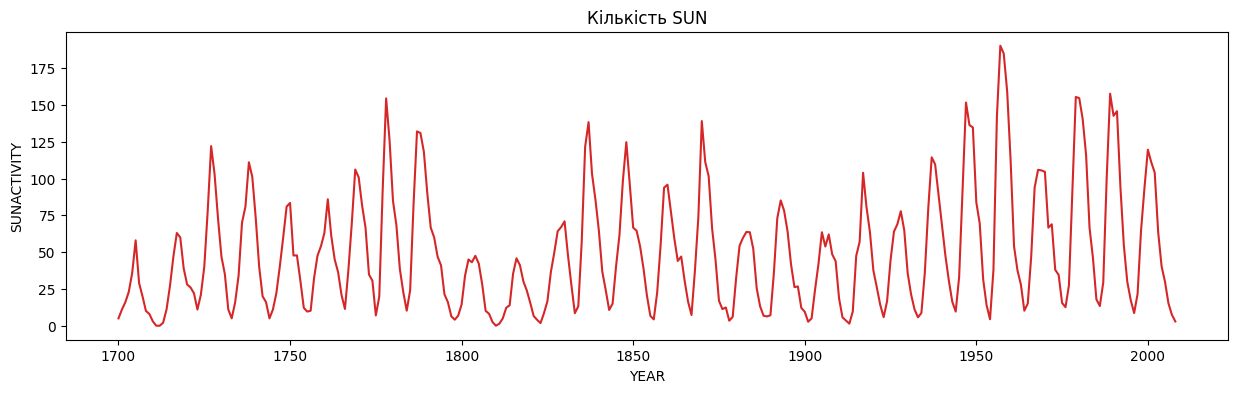

In [61]:
plot_df(df, x=df['YEAR'], y=df['SUNACTIVITY'], title='Кількість SUN')

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

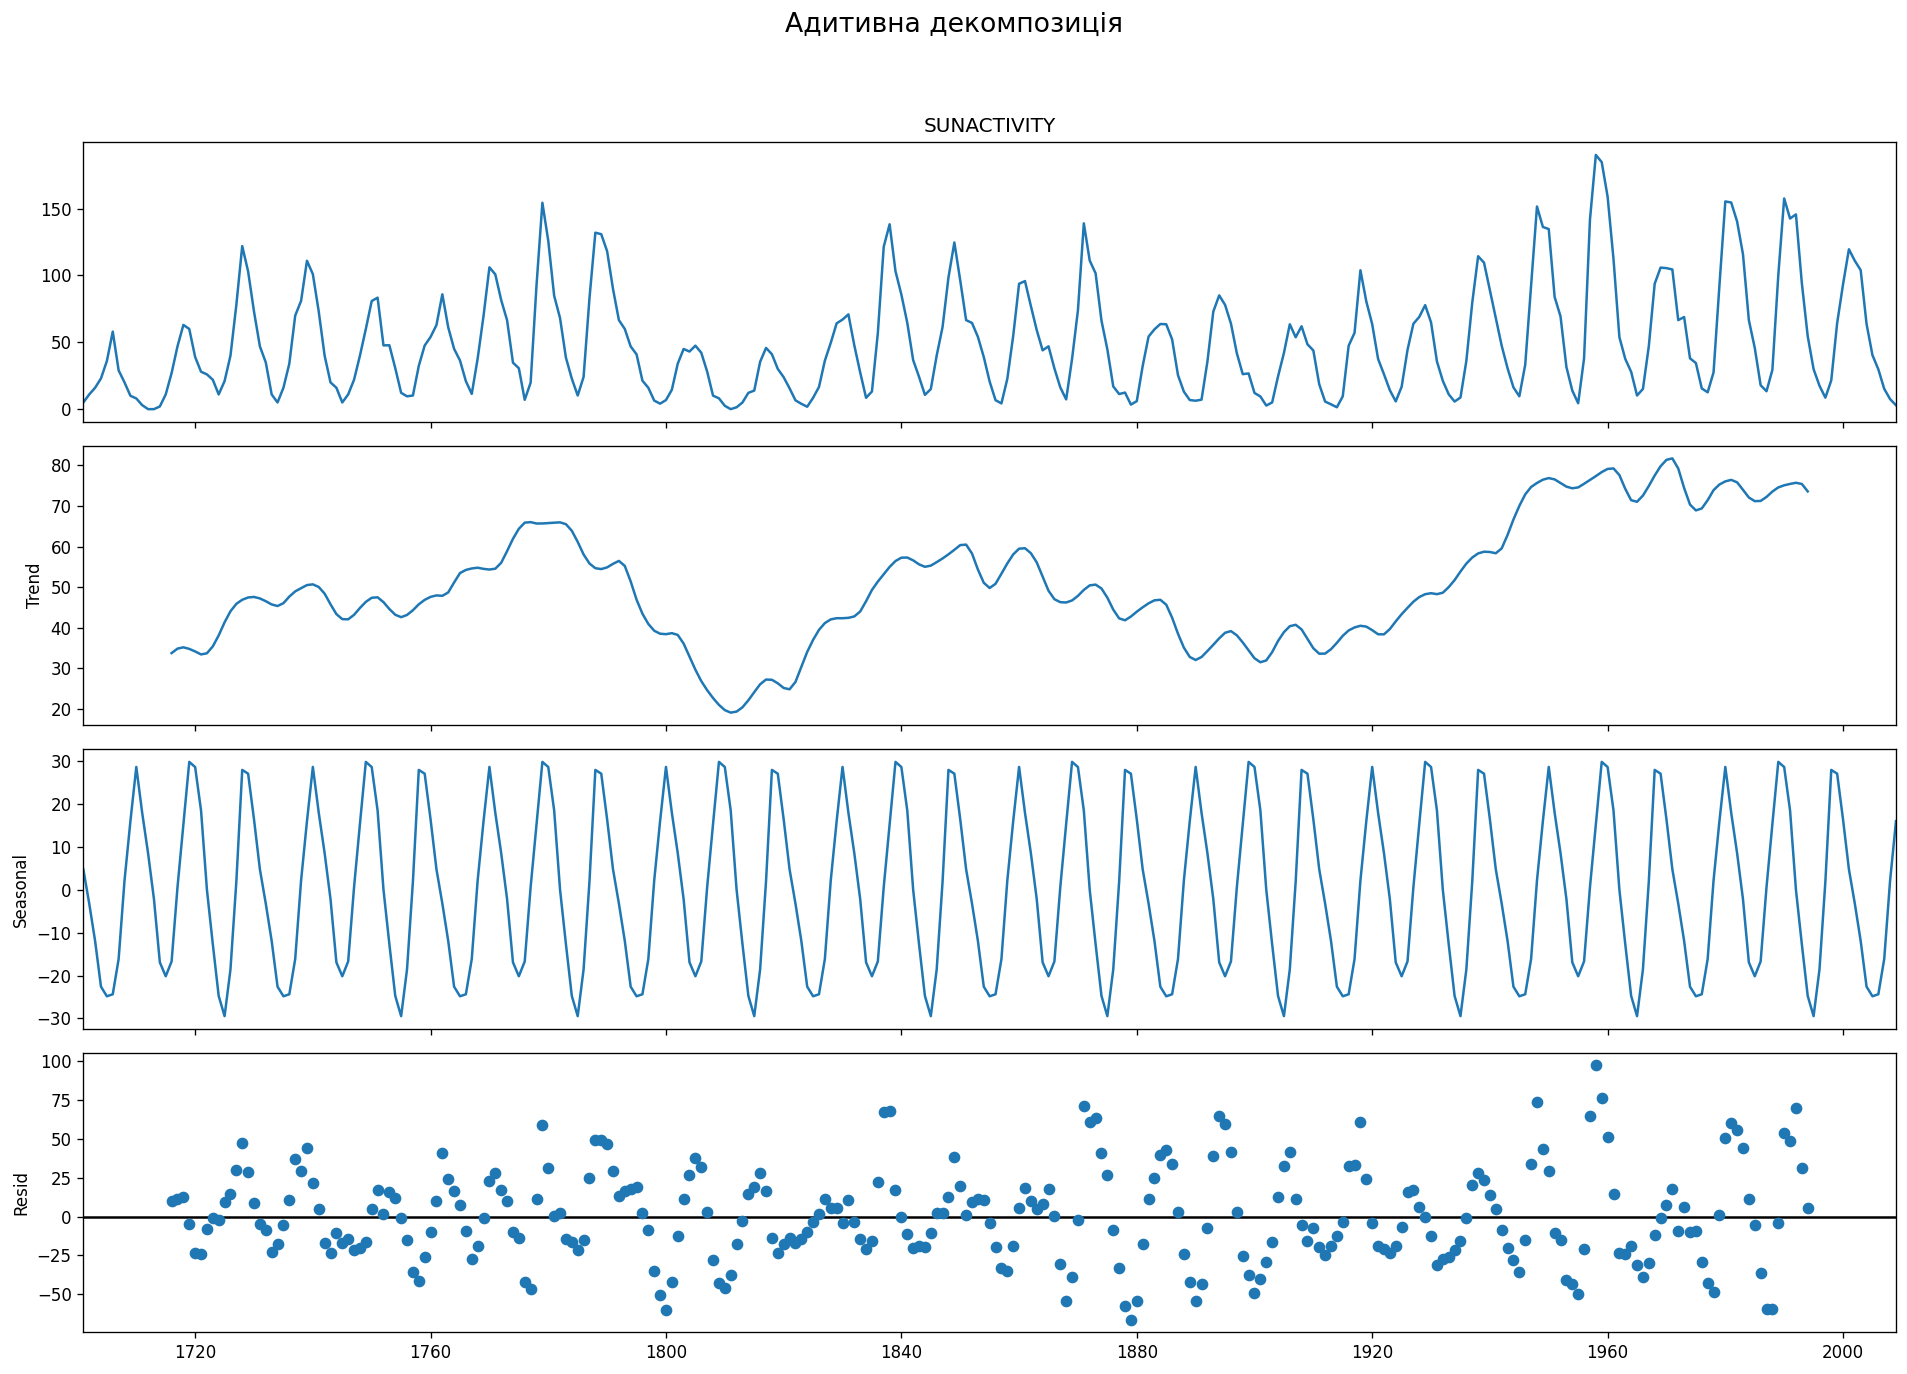

In [62]:
# Additive Decomposition
additive_decomposition = seasonal_decompose(df['SUNACTIVITY'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})

additive_decomposition.plot().suptitle('Адитивна декомпозиція', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [63]:
# ADF Test
result = adfuller(df['SUNACTIVITY'].values, autolag='AIC')
print(f'ADF-статистика: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Критичні значення:')
    print(f'   {key}, {value}')

ADF-статистика: -2.8377807249382
p-value: 0.053076421728119924
Критичні значення:
   1%, -3.4523371197407404
Критичні значення:
   5%, -2.871222860740741
Критичні значення:
   10%, -2.571929211111111


Text(0.5, 1.0, 'Авіапасажири. Детрендування часового ряду через видалення лінії тренду уздовж осі даних')

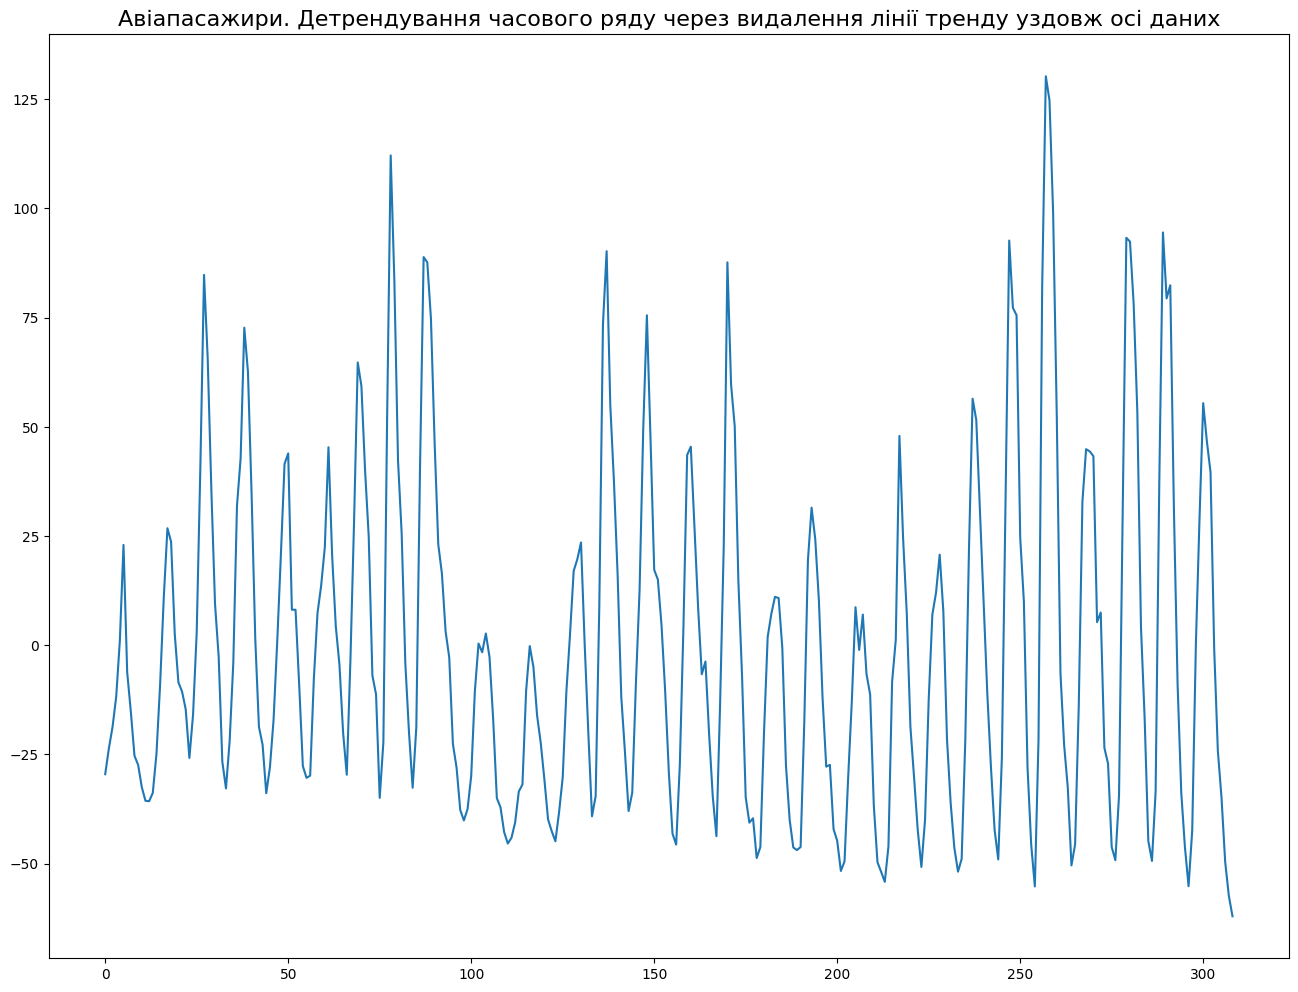

In [23]:
from scipy import signal
detrended = signal.detrend(df['SUNACTIVITY'].values)
plt.plot(detrended)
plt.title('SUNACTIVITY. Детрендування часового ряду через видалення лінії тренду уздовж осі даних', fontsize=16)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

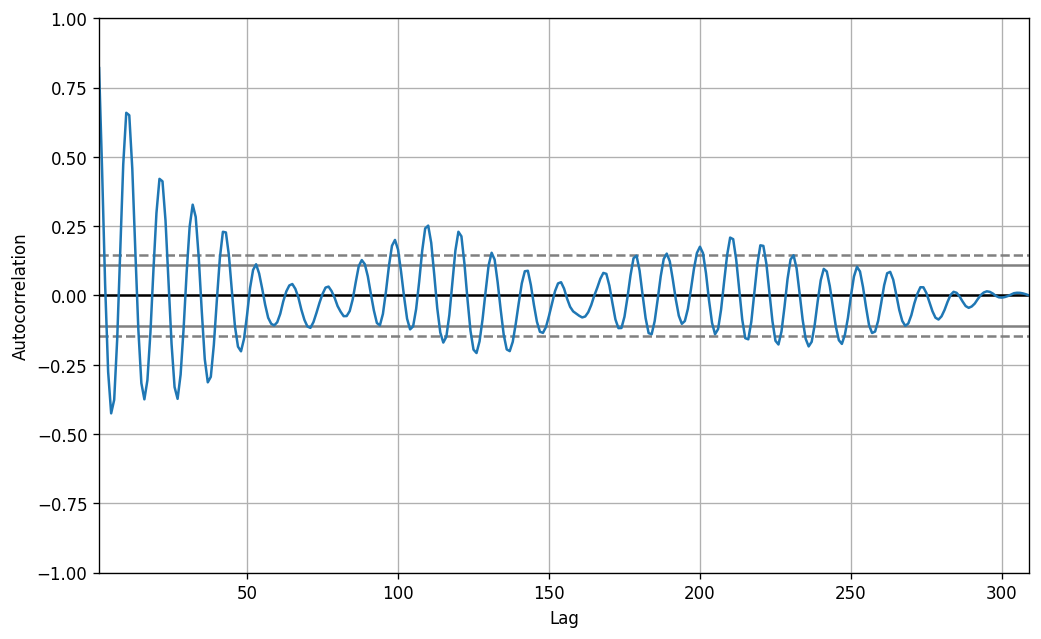

In [64]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['SUNACTIVITY'].tolist())

[]

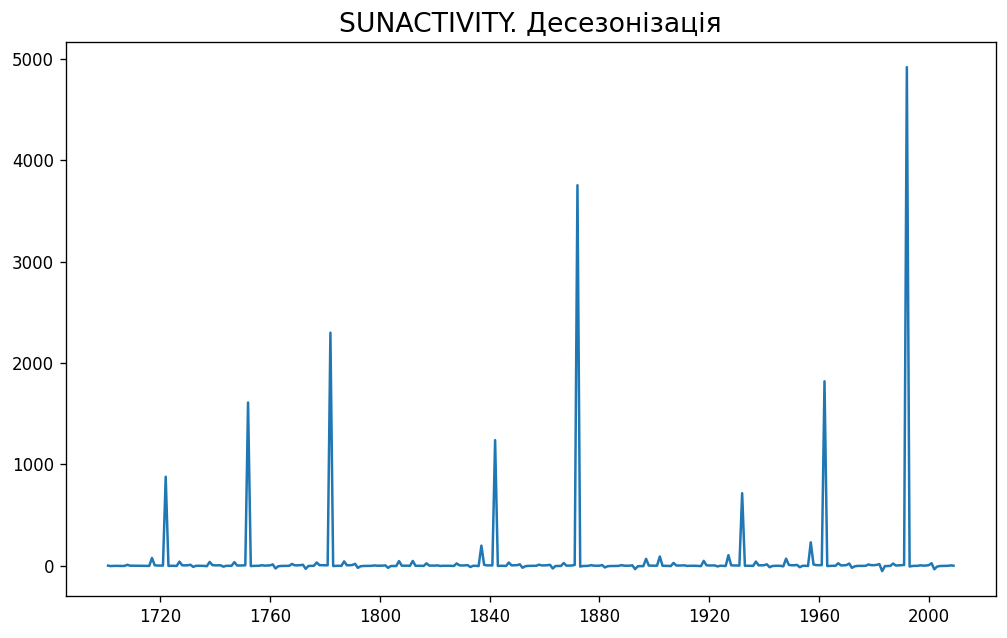

In [65]:
# Розкладання часових рядів
result_mul = seasonal_decompose(df['SUNACTIVITY'], model='adictive', period=30)


# Десезонізація
deseasonalized = df['SUNACTIVITY'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('SUNACTIVITY. Десезонізація', fontsize=16)
plt.plot()

In [41]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

In [66]:
arma_mod20 = ARIMA(df.SUNACTIVITY, order=(2, 0, 0)).fit()
print(arma_mod20.params)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64


C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


In [67]:
arma_mod30 = ARIMA(df.SUNACTIVITY, order=(3, 0, 0)).fit()
print(arma_mod30.params)

C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64


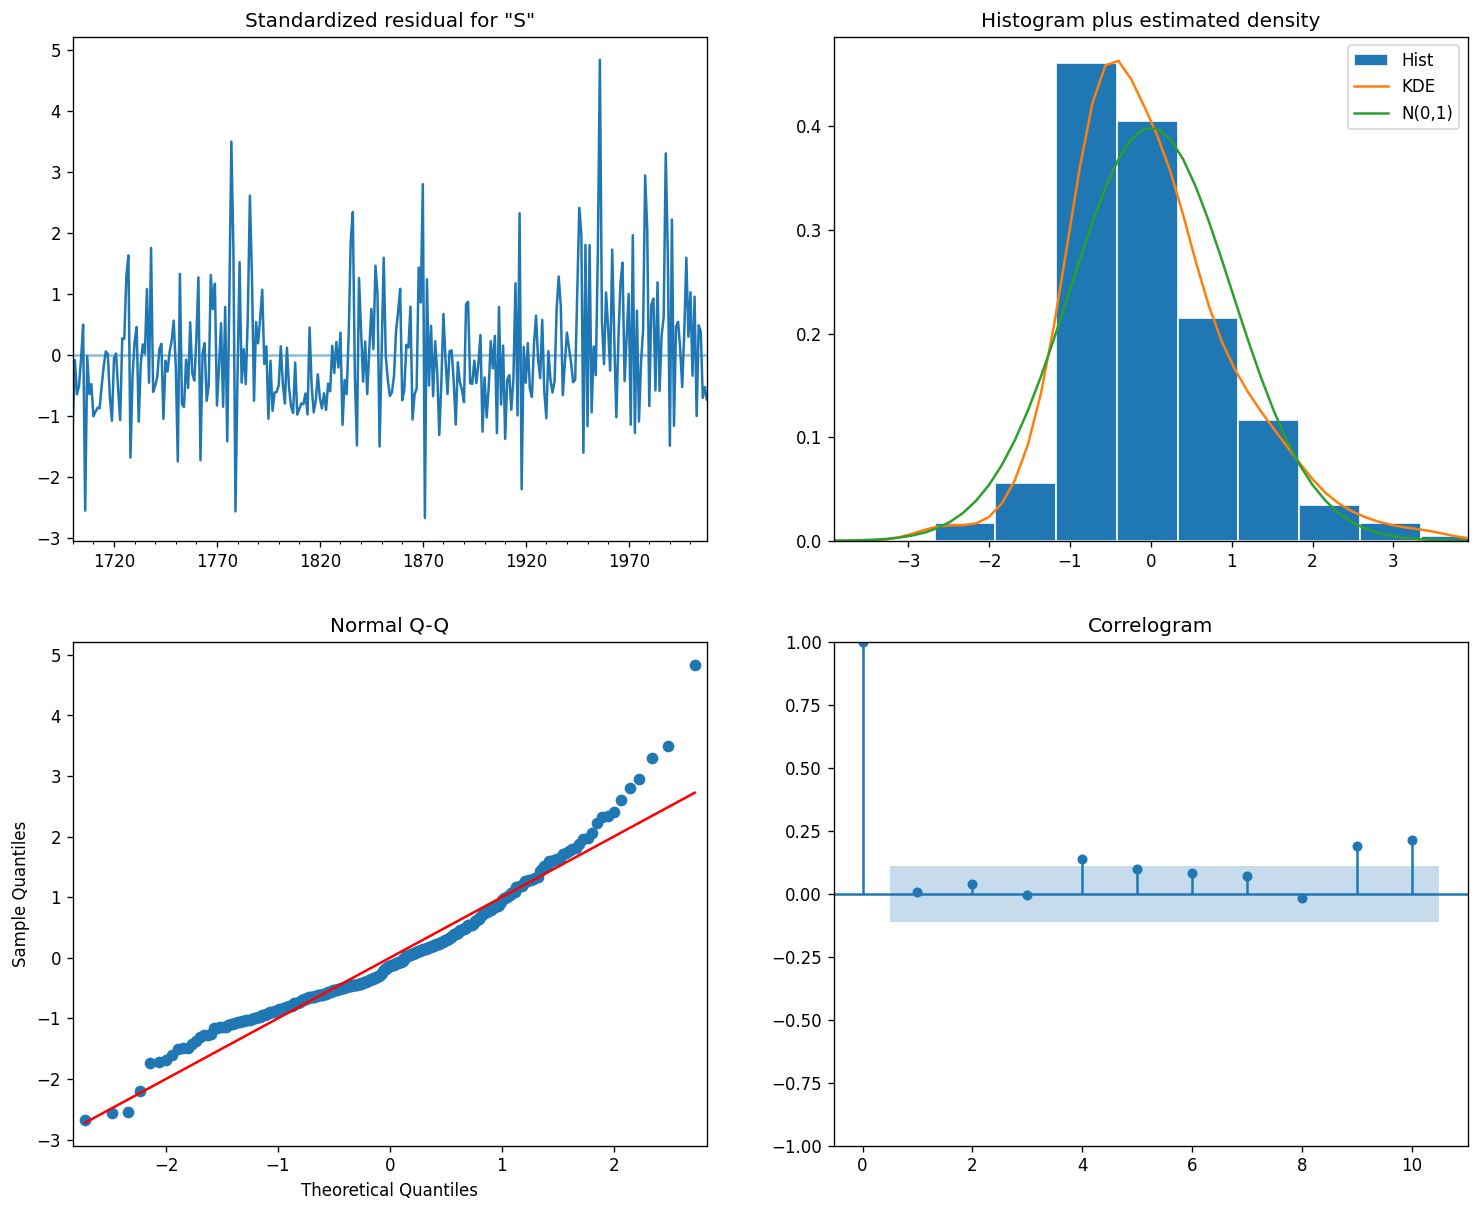

In [68]:
arma_mod30.plot_diagnostics(figsize=(15, 12))
plt.show()

In [69]:
#predict_sun = arma_mod30.predict('1990', '2012', dynamic=True)

#predict_sun = arma_mod30.predict(start=df.shape[0],end=(df.shape[0]+30), dynamic=False)
#print(predict_sun)
end_year = 2030-2009
pred = arma_mod30.predict(start=df.shape[0], end=(df.shape[0]+end_year), dynamic=False)
print(pred)

2009-12-31    14.753858
2010-12-31    33.509098
2011-12-31    52.479638
2012-12-31    66.090489
2013-12-31    71.725244
2014-12-31    69.679910
2015-12-31    62.391704
2016-12-31    53.219803
2017-12-31    45.257151
2018-12-31    40.504329
2019-12-31    39.556698
2020-12-31    41.771235
2021-12-31    45.749611
2022-12-31    49.922398
2023-12-31    53.041909
2024-12-31    54.463849
2025-12-31    54.187525
2026-12-31    52.701162
2027-12-31    50.723728
2028-12-31    48.942495
2029-12-31    47.822874
2030-12-31    47.527861
Freq: A-DEC, Name: predicted_mean, dtype: float64
